https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

In [1]:
import pandas as pd
import numpy as np
import sklearn
import nltk

In [9]:
df = pd.read_table('SMSSpamCollection',  
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [10]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [12]:
df['message'] = df['message'].map(lambda x: x.lower())

In [15]:
df

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [14]:
df['message'] = df['message'].str.replace('[^\w\s]', "")

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
df['message'] = df['message'].apply(nltk.word_tokenize)

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x] )

In [10]:
df

,label,message
0,0,"[go, until, jurong, point, crazi, avail, onli,..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"[nah, i, dont, think, he, goe, to, usf, he, li..."
...,...,...
5567,1,"[thi, is, the, 2nd, time, we, have, tri, 2, co..."
5568,0,"[will, ü, b, go, to, esplanad, fr, home]"
5569,0,"[piti, wa, in, mood, for, that, soani, other, ..."
5570,0,"[the, guy, did, some, bitch, but, i, act, like..."


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

In [12]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['message'])

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=69)

In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [29]:
import numpy as np

predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.9480286738351255


In [34]:
from sklearn.metrics import confusion_matrix, plot_roc_curve

print(confusion_matrix(y_test, predicted))

[[482   0]
 [ 29  47]]


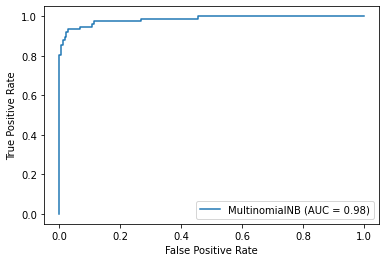

In [37]:
plot_roc_curve(model, X_test, y_test)